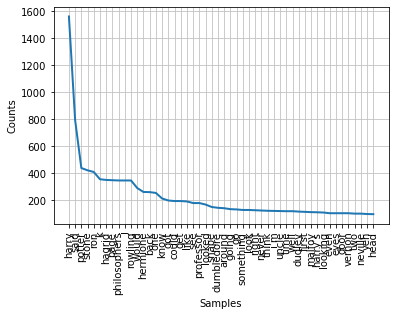

총 토큰 개수: 44788


In [1]:
#potter
#1. 파일 불러오기, 구두점 리스트 만들기
import nltk
import string
from nltk import FreqDist
import matplotlib.pyplot as plt
punct = list(string.punctuation)
punct.extend('—')
punct.extend('”')
punct.extend('\n')

f = open ('HarryPotter.txt','rt',encoding='UTF8')
first_text = f.readlines()
#2. 문장 분절하기
# '.'으로 분절 시 잘못 분절될 수 있는 Mr, Mrs 등과 작가 이름 수정하기
# '.'으로 끝나지 않아서 분절되지 않는 페이지, 챕터명 등 수정 
first_text = [sen.replace('\n','').replace('...','').replace('Mr.','Mr').replace('Mrs.','Mrs')
              .replace ('J.K. Rowling','J K Rowling.').replace('?','.').replace('!','.').replace(';','.').replace('Page','.Page')
              if not sen.isupper()
              else sen + '.'
              for sen in first_text]
first_text = ''.join([word for word in first_text])
first_text = first_text.split('.')
#3. 토큰(단어) 분절하기
# 한 단어 내에 있는 특수기호, '' 제거하기
sen_token = []
for sentence in first_text :
    sentence = sentence.split(' ')
    sen_token.append(sentence)
sen_token = [[word.strip('\\”').strip('“').strip('(“').strip('’').strip(',') for word in sent if not word in punct]
             for sent in sen_token]
sen_token = [[word for word in sent if word != '']for sent in sen_token]

#4. 예외 단어 처리
# 'aphostrophe
except_word = {"Don’t":'Do-not',"don’t":'do-not',"I’d":'I-would',"He’d":"He-would","he’d":'he-would',
               "I’ve":'I-have',"they’ve":'they-have', "o’ tea":'of-tea',
               "abou’":'about', "jus’":'just',"myst’ry":'mystery',
               "C’mere":'Come-here',"C’mon":'Come-on',"can’t":'cannot',"’til":'until',
               "They’re":'They-are',"they’re":'they-are',"We’re":'We-are'}
for key in except_word.keys() :
    sen_token = [[word.replace(key,except_word[key]) for word in sent] for sent in sen_token]

#앞서 하이픈으로 처리한 예외단어 분절
token_list = []
for sent in sen_token :
    sent = [i for word in sent for i in word.split("-")]
    token_list.append(sent)

#4-2. 불용어 및 빈 리스트 제거
word_token = []
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [word.replace("'","’") for word in stopwords]
word_token = [[word for word in sent 
               if word.lower() not in stopwords and word] 
              for sent in token_list]
word_token = [sent for sent in word_token if sent]

#5. 정제 후 남은 토큰 uncasing한 뒤, top 50 그림 그리기
uncasing_tokens = []
for sent in word_token :
    for word in sent :
        uncasing_tokens.append(word.lower())

top_fifty = FreqDist(uncasing_tokens)
top_fifty.most_common(50)
top_fifty.plot(50)

#6. 총 토큰 개수 출력
print(f'총 토큰 개수: {len(uncasing_tokens)}')